In [0]:
!pip install MonthDelta
!pip install nepali_date

  Created wheel for MonthDelta: filename=MonthDelta-0.9.1-cp36-none-any.whl size=3111 sha256=bd0952131d074fdf65d5163c6863aa3216aa83a66fc51d64dc98a2c63c3472cc
  Stored in directory: /root/.cache/pip/wheels/5e/e9/68/c0cb0cefe6fdd49ce42a99196b272748d2d823c18c7af612cf
Successfully built MonthDelta
  Created wheel for nepali-date: filename=nepali_date-2.0.2-cp36-none-any.whl size=9556 sha256=807fd0cd6a52daa504734c52c1d63ceca331542b9a85efb6eeaf17442399868d
  Stored in directory: /root/.cache/pip/wheels/97/8a/f8/8a55c78dab59306c788110e5e3addd967e5b1d710e144be403
Successfully built nepali-date


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import string
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
import datetime
from dateutil.relativedelta import relativedelta
from monthdelta import monthdelta
from nepali_date import NepaliDate

## NEPSE data creating monthly data

In [0]:
url_nepse = 'https://github.com/nik1997/capstone2020/raw/master/data/nepse_index.csv'
df_nepse = pd.read_csv(url_nepse, skip_blank_lines=True, header=0)

# Converting date time
df_nepse['Date'] = pd.to_datetime(df_nepse['Date'])
df_nepse = df_nepse.sort_values(by='Date', ascending=True)
df_nepse = df_nepse.drop(columns=['S.N'], axis=1)
df_nepse.reset_index(inplace=True)
df_nepse = df_nepse.drop(columns=['index'], axis=1)
df_nepse.head()

,Date,Open,High,Low,Close,Absolute,Percentage,Volume,Trunover
0,1997-07-20,173.26,173.26,173.26,173.26,173.26,100%,173,NaN
1,1997-07-21,173.25,173.25,173.25,173.25,-0.01,0.006%,173,NaN
2,1997-07-22,173.03,173.03,173.03,173.03,-0.22,0.127%,173,NaN
3,1997-07-23,172.68,172.68,172.68,172.68,-0.35,0.203%,173,NaN
4,1997-07-24,172.66,172.66,172.66,172.66,-0.02,0.012%,173,NaN


In [0]:
def get_year(date):
    return date.year
def get_month(date):
    return date.month

df_nepse['year'] = df_nepse['Date'].apply(get_year)
df_nepse['month'] = df_nepse['Date'].apply(get_month)
df_nepse['Absolute'][0] = 0 
df_nepse.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Open,High,Low,Close,Absolute,Percentage,Volume,Trunover,year,month
0,1997-07-20,173.26,173.26,173.26,173.26,0.00,100%,173,NaN,1997,7
1,1997-07-21,173.25,173.25,173.25,173.25,-0.01,0.006%,173,NaN,1997,7
2,1997-07-22,173.03,173.03,173.03,173.03,-0.22,0.127%,173,NaN,1997,7
3,1997-07-23,172.68,172.68,172.68,172.68,-0.35,0.203%,173,NaN,1997,7
4,1997-07-24,172.66,172.66,172.66,172.66,-0.02,0.012%,173,NaN,1997,7


In [0]:
# Calculating daily returns
returns = [0] # for the first value
for i in range(1, df_nepse.shape[0]):
    returns.append((df_nepse['Close'][i] - df_nepse['Close'][i-1]) / df_nepse['Close'][i-1])
df_nepse['returns'] = returns
df_nepse.tail()

,Date,Open,High,Low,Close,Absolute,Percentage,Volume,Trunover,year,month,returns
5168,2019-12-02,1112.87,1113.73,1110.98,1111.99,0.86,-0.08%,826368,232259331.0,2019,12,-0.000773
5169,2019-12-03,1112.06,1117.82,1111.19,1115.74,3.75,0.34 %,1010991,266801558.0,2019,12,0.003372
5170,2019-12-04,1116.12,1128.00,1116.12,1124.47,8.73,0.78 %,990274,308214465.0,2019,12,0.007824
5171,2019-12-05,1124.47,1134.93,1124.44,1131.92,7.45,0.66 %,1095188,358839860.0,2019,12,0.006625
5172,2019-12-08,1131.92,1135.37,1125.81,1135.37,3.45,0.31 %,987739,287527825.0,2019,12,0.003048


In [0]:
unique_months = df_nepse.groupby(['year','month'], as_index=False).size().reset_index().rename(columns={0:'count'})

In [0]:
def get_monthly_data(year, month):
    df_month = df_nepse.loc[(df_nepse['year']==year) & (df_nepse['month']==month)]
    return df_month['Date'].iloc[-1], df_month['Close'].iloc[-1], np.sum(np.square(df_month['returns']))

dates = []
nepse_indexes = []
nepse_returns = [0]
s_vars = []

for i in range(unique_months.shape[0]):
    date, nepse_index, s_var  = get_monthly_data(unique_months.iloc[i].year, unique_months.iloc[i].month)
    dates.append(date)
    nepse_indexes.append(nepse_index)
    s_vars.append(s_var)

# calculating monthly retruns
for i in range(1, len(nepse_indexes)):
    nepse_returns.append((nepse_indexes[i] - nepse_indexes[i-1]) / nepse_indexes[i-1])

df_monthly_nepse = pd.DataFrame({
    'Date': dates,
    'NEPSE': nepse_indexes,
    'NEPSE_returns': nepse_returns,
    'SVAR': s_vars
})

df_monthly_nepse.head()

,Date,NEPSE,NEPSE_returns,SVAR
0,1997-07-31,171.70,0.000000,0.000040
1,1997-08-31,169.64,-0.011998,0.000084
2,1997-09-30,171.23,0.009373,0.000210
3,1997-10-29,173.43,0.012848,0.000398
4,1997-11-30,171.64,-0.010321,0.000181


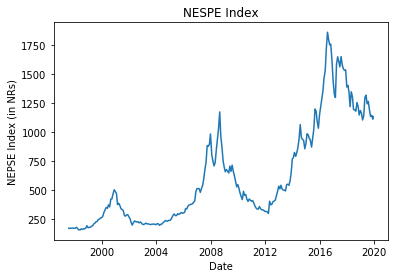

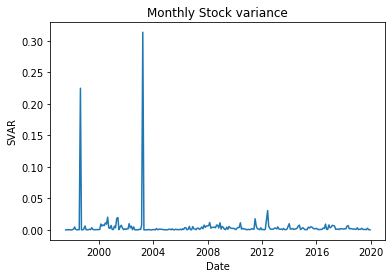

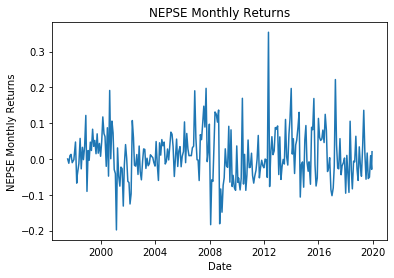

In [0]:
plt.plot(df_monthly_nepse['Date'], df_monthly_nepse['NEPSE'])
plt.xlabel('Date')
plt.ylabel('NEPSE Index (in NRs)')
plt.title('NESPE Index')
plt.show()

plt.plot(df_monthly_nepse['Date'], df_monthly_nepse['SVAR'])
plt.xlabel('Date')
plt.ylabel('SVAR')
plt.title('Monthly Stock variance')
plt.show()

plt.plot(df_monthly_nepse['Date'], df_monthly_nepse['NEPSE_returns'])
plt.xlabel('Date')
plt.ylabel('NEPSE Monthly Returns')
plt.title('NEPSE Monthly Returns')
plt.show()

## Treasury bill yield

In [0]:
url = 'nepal_treasury_bills_yield.csv'
df_treasury = pd.read_csv(url, skiprows=2)
df_treasury = df_treasury.drop(columns=['Open', 'Ticker', 'High', 'Low'])
df_treasury.columns = ['Date', 'Treasury Bills Yield']
df_treasury['Date'] = pd.to_datetime(df_treasury['Date'])
df_treasury.head()

,Date,Treasury Bills Yield
0,1981-01-31,5.0
1,1981-02-27,5.0
2,1981-03-31,5.0
3,1981-04-30,5.0
4,1981-05-29,5.0


In [0]:
def get_average_monthly_yield(df, year, month):
    df_month = df.loc[(df['year']==year) & (df['month']==month)]
    return df_month['Date'].iloc[-1], np.mean(df_month['Treasury Bills Yield'])/100
 
df_treasury['year'] = df_treasury['Date'].apply(get_year)
df_treasury['month'] = df_treasury['Date'].apply(get_month)
df_treasury.head()
treasury_unique_months = df_treasury.groupby(['year','month'], as_index=False).size().reset_index().rename(columns={0:'count'})

treasury_yields = []
dates = []

for i in range(treasury_unique_months.shape[0]):
    date, treasury_yield  = get_average_monthly_yield(df_treasury,
                                                        treasury_unique_months.iloc[i].year, 
                                                        treasury_unique_months.iloc[i].month)
    dates.append(date)
    treasury_yields.append(treasury_yield)


df_monthly_treasury = pd.DataFrame({
    'Date': dates,
    'treasury_yields': treasury_yields
})
df_monthly_treasury.head()

,Date,treasury_yields
0,1981-01-31,0.05
1,1981-02-27,0.05
2,1981-03-31,0.05
3,1981-04-30,0.05
4,1981-05-29,0.05


## Govenment bond yield

In [0]:
url = 'nepal_government_bond_yield(1981-2015).csv'
df_gov_bond = pd.read_csv(url, skiprows=2)
df_gov_bond = df_gov_bond.drop(columns=['Ticker'])
df_gov_bond.columns = ['Date', 'Government Bond Yield']
df_gov_bond['Date'] = pd.to_datetime(df_gov_bond['Date'])
df_gov_bond.head()

,Date,Government Bond Yield
0,1981-06-30,10.0
1,1981-07-31,10.5
2,1981-08-31,10.5
3,1981-09-30,10.5
4,1981-10-30,10.5


In [0]:
df_gov_bond['year'] = df_gov_bond['Date'].apply(get_year)
df_gov_bond['month'] = df_gov_bond['Date'].apply(get_month)
df_gov_bond.head()
gov_bond_unique_months = df_gov_bond.groupby(['year','month'], as_index=False).size().reset_index().rename(columns={0:'count'})

In [0]:
gov_bond_unique_months[gov_bond_unique_months['count'] > 1]
# thus, there is already unique month value available.

,year,month,count


In [0]:
# converting to absolute values
df_gov_bond['Government Bond Yield'] = df_gov_bond['Government Bond Yield']/100

df_monthly_gov_bond = pd.DataFrame({
    'Date': df_gov_bond['Date'],
    'gov_bond_yield': df_gov_bond['Government Bond Yield']
})
df_monthly_gov_bond.head()

,Date,gov_bond_yield
0,1981-06-30,0.100
1,1981-07-31,0.105
2,1981-08-31,0.105
3,1981-09-30,0.105
4,1981-10-30,0.105


## Inflation

In [0]:
url = 'nepal_cpi_inflation_1963-2020.csv'
df_infl = pd.read_csv(url, skiprows=2)
df_infl = df_infl.drop(columns=['Ticker', 'Open', 'High', 'Low'])
df_infl.columns = ['Date', 'CPI']
df_infl['Date'] = pd.to_datetime(df_infl['Date'])
df_infl.head()

,Date,CPI
0,1963-07-31,1.731763
1,1963-08-30,1.728388
2,1963-09-30,1.723365
3,1963-10-31,1.746859
4,1963-11-29,1.810617


In [0]:
df_infl['year'] = df_infl['Date'].apply(get_year)
df_infl['month'] = df_infl['Date'].apply(get_month)
infl_unique_months = df_infl.groupby(['year','month'], as_index=False).size().reset_index().rename(columns={0:'count'})
infl_unique_months[infl_unique_months['count'] > 1]
# thus, there is already unique month value available.

,year,month,count


In [0]:
# calculating inflation

inflations = [0] + [((df_infl['CPI'].iloc[i]/df_infl['CPI'].iloc[i-1]) - 1) for i in range(1, df_infl.shape[0])]

df_infl['infl'] = inflations

df_monthly_inflation = pd.DataFrame({
    'Date': df_infl['Date'],
    'infl': df_infl['infl'] 
})
df_monthly_inflation.head()

,Date,infl
0,1963-07-31,0.000000
1,1963-08-30,-0.001949
2,1963-09-30,-0.002906
3,1963-10-31,0.013633
4,1963-11-29,0.036499


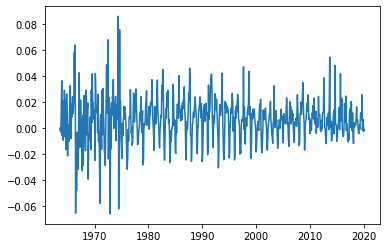

In [0]:
plt.plot(df_infl['Date'], df_infl['infl'])
plt.show()

## Net equity expansion

In [0]:
url = 'nepse_equity_issues.csv'
df_ntis = pd.read_csv(url)
df_ntis = df_ntis.drop(columns=['Unnamed: 5'])
df_ntis.head()

,Company,Type,Amount,Permission AD Date,Permission BS Date
0,Nepal Med Ltd.,Ordinary Share,2.7,28/07/1993,NaN
1,NIDC Capital Markets Ltd.,Mutual Fund,100,28/07/1993,NaN
2,Nepal Share Markets Co. Ltd.,Ordinary Share,4,21/09/1993,NaN
3,Himalayan General Insurance Co. Ltd.,Ordinary Share,12,28/09/1993,NaN
4,Harisiddhi Brick & Tiles Factory Ltd.,Ordinary Share,53.2,1993/12/12,NaN


In [0]:
def split_dates(x):
    return x.split(' ')[0] if ' ' in str(x) else x

df_ntis['Permission AD Date'] = df_ntis['Permission AD Date'].apply(split_dates)

In [0]:
def convert_bs_to_ad(date_str):
    if type(date_str) == str:
        year, month, day = date_str.split('/')
        return NepaliDate(year, month, day).to_english_date().strftime('%Y/%m/%d')
    
    return date_str

df_ntis['Date'] = df_ntis['Permission BS Date'].apply(convert_bs_to_ad)
df_ntis.head()

,Company,Type,Amount,Permission AD Date,Permission BS Date,Date
0,Nepal Med Ltd.,Ordinary Share,2.7,28/07/1993,NaN,NaN
1,NIDC Capital Markets Ltd.,Mutual Fund,100,28/07/1993,NaN,NaN
2,Nepal Share Markets Co. Ltd.,Ordinary Share,4,21/09/1993,NaN,NaN
3,Himalayan General Insurance Co. Ltd.,Ordinary Share,12,28/09/1993,NaN,NaN
4,Harisiddhi Brick & Tiles Factory Ltd.,Ordinary Share,53.2,1993/12/12,NaN,NaN


In [0]:
for i in range(df_ntis.shape[0]):
    if str(df_ntis['Date'].iloc[i]) == 'nan':
        df_ntis['Date'].iloc[i] = df_ntis['Permission AD Date'].iloc[i]

df_ntis = df_ntis.drop(columns=['Company', 'Permission AD Date','Permission BS Date'])
df_ntis = df_ntis.dropna()
df_ntis['Date'] = pd.to_datetime(df_ntis['Date'])
df_ntis.head()

,Type,Amount,Date
0,Ordinary Share,2.7,1993-07-28
1,Mutual Fund,100,1993-07-28
2,Ordinary Share,4,1993-09-21
3,Ordinary Share,12,1993-09-28
4,Ordinary Share,53.2,1993-12-12


In [0]:
df_ntis['Type'].unique()

array(['Ordinary Share', 'Mutual Fund', 'Preference Share', 'Unit Scheme',
       'Rights Share', 'Debenture', 'Ordinary Share (not issued)',
       'Ordinary Share (Not issued)', 'Pref. Share', 'Rights Shares',
       'Ordinary', 'Rights', 'Ordinary Shares', 'Share', 'Bonus', 'Units',
       'Unit', 'Promoter', 'Debentures'], dtype=object)

In [0]:
# Only picking the issued shares
shares_labels = ['Ordinary Share', 'Preference Share', 
                'Rights Share', 'Pref. Share', 'Rights Shares',
                'Ordinary', 'Rights', 'Ordinary Shares', 'Share', 
                'Bonus', 'Promoter']
df_ntis_equity = df_ntis[df_ntis['Type'].isin(shares_labels)]

In [0]:
def get_monthly_issues(df, year, month):
    df_month = df.loc[(df['year']==year) & (df['month']==month)]
    return df_month['Date'].iloc[-1], np.sum(df_month['Amount'])
 
df_ntis_equity['year'] = df_ntis_equity['Date'].apply(get_year)
df_ntis_equity['month'] = df_ntis_equity['Date'].apply(get_month)
ntis_equity_unique_months = df_ntis_equity.groupby(['year','month'], as_index=False).size().reset_index().rename(columns={0:'count'})

ntis_equity_issues = []
dates = []

for i in range(ntis_equity_unique_months.shape[0]):
    date, ntis_equity_issue  = get_monthly_issues(df_ntis_equity,
                                                        ntis_equity_unique_months.iloc[i].year, 
                                                        ntis_equity_unique_months.iloc[i].month)
    dates.append(date)
    ntis_equity_issues.append(ntis_equity_issue)


df_monthly_ntis_equity = pd.DataFrame({
    'Date': dates,
    'ntis_equity_issues': ntis_equity_issues
})
df_monthly_ntis_equity.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,ntis_equity_issues
0,1993-07-28,2.7
1,1993-09-28,412
2,1993-12-30,53.21813.8
3,1994-01-30,24
4,1994-02-22,36


#### Calculating total market capitalization annually

In [0]:
# Getting the total capitalization data
url = 'nepal_stock_capitalization_1995-2019.csv'
df_capitalization = pd.read_csv(url, skiprows=2)
df_capitalization = df_capitalization.drop(columns=['Ticker'])
df_capitalization.columns = ['Date', 'Market Capitalization']
df_capitalization['Date'] = pd.to_datetime(df_capitalization['Date'])

df_capitalization

,Date,Market Capitalization
0,1994-07-31,13872.0
1,1995-07-31,12963.0
2,1996-07-31,12295.0
3,1997-07-31,12698.0
4,1998-07-31,14289.0
...,...,...
181,2018-07-31,1435137.7
182,2018-10-31,1481221.4
183,2019-01-31,1436672.6
184,2019-04-30,1462507.7


## Combining Datasets

In [0]:
def convert_to_string_year_month(date):
    return date.strftime('%Y-%m')

df_monthly_nepse['Date'] = df_monthly_nepse['Date'].apply(convert_to_string_year_month)
df_monthly_treasury['Date'] = df_monthly_treasury['Date'].apply(convert_to_string_year_month)
df_monthly_gov_bond['Date'] = df_monthly_gov_bond['Date'].apply(convert_to_string_year_month)
df_monthly_inflation['Date'] = df_monthly_inflation['Date'].apply(convert_to_string_year_month)


df = df_monthly_nepse
df = df.set_index('Date').join(df_monthly_treasury.set_index('Date'))
df = df.join(df_monthly_gov_bond.set_index('Date'))
df = df.join(df_monthly_inflation.set_index('Date'))
df.head()

,NEPSE,NEPSE_returns,SVAR,treasury_yields,gov_bond_yield,infl
Date,,,,,,
1997-07,171.70,0.000000,0.000040,0.0559,0.09,0.009183
1997-08,169.64,-0.011998,0.000084,0.0434,0.09,0.047316
1997-09,171.23,0.009373,0.000210,0.0328,0.09,-0.000869
1997-10,173.43,0.012848,0.000398,0.0427,0.09,0.016522
1997-11,171.64,-0.010321,0.000181,0.0306,0.09,-0.009410


In [0]:
# Writing down to a csv file
df.to_csv('nepse_data.csv')

# S&P 500

In [0]:
# Creating an array of dates to for plotting purposes
def change_to_date_time_string(num_date):
    '''
        The original data set stores the dates in numbers as format yyyymm, 
        which has been converted into integer

        This function gets the date as integer, and converts into string format of
        YYYY-MM-DD, where DD for each date is assumed to be 01
    '''
    str_date = str(num_date)
    remodified_date = '{0}-{1}'.format(str_date[:4], str_date[4:6])
    return remodified_date

In [0]:
url_data = 'nepse_data.csv'
df_nepse = pd.read_csv(url_data)
df_nepse = df_nepse.dropna()
print(df_nepse.columns)

Index(['Date', 'indexes', 'returns', 'SVAR', 'treasury_yields',
       'gov_bond_yields', 'infl'],
      dtype='object')


In [0]:
# reading monthly data
url_data = 'Returns_handbook_data.xls'
df_sp500 = pd.read_excel(url_data, 'Monthly')
df_sp500.tail()

,yyyymm,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
1771,201808,2901.52,52.338996,130.39,0.229618,0.0203,0.0388,0.0477,0.0293,-0.021495,0.001692,0.000556,0.0152,0.0058,0.000471,NaN,0.032938,0.030647
1772,201809,2913.98,52.338996,130.39,0.225335,0.0213,0.0398,0.0488,0.0334,-0.020871,0.001775,0.001162,-0.0518,-0.0120,0.000230,NaN,0.005138,0.003758
1773,201810,2711.74,53.748178,132.39,0.237380,0.0225,0.0414,0.0507,0.0352,-0.021222,0.001875,0.001767,-0.0204,-0.0323,0.004578,NaN,-0.068409,-0.069492
1774,201811,2760.17,53.748178,132.39,0.233451,0.0233,0.0422,0.0522,0.0317,-0.024593,0.001942,-0.003349,0.0505,0.0071,0.002838,NaN,0.019980,0.017477
1775,201812,2506.85,53.748178,132.39,0.255578,0.0237,0.0402,0.0513,0.0284,-0.019217,0.001975,-0.003194,0.0481,0.0370,0.006793,NaN,-0.090928,-0.092457


In [0]:
# Equity premium

idx_first = 671 # starting data_sp500 1926:11 from the Excel file
#  = 1679 # final date 2010:12 from the Excel file

dates = np.array(df_sp500.loc[idx_first:, 'yyyymm'])
sp500_indexes = np.array(df_sp500.loc[idx_first:, 'Index'])

returns = [0] + [((sp500_indexes[i] / sp500_indexes[i-1]) - 1) for i in range(1, len(sp500_indexes)) ]
sp500_returns = np.log(1 + np.array(returns).flatten())
svar = np.array(df_sp500.loc[idx_first:, 'svar'])
# t-bill raate
tbl = np.array(df_sp500.loc[idx_first:, 'tbl'])
# long-term government bond yield
lty = np.array(df_sp500.loc[idx_first:, 'lty'])
# term spread
tms=lty-tbl
# inflation
infl = np.array(data_sp500.loc[idx_first:, 'infl'])

df_nyse = pd.DataFrame({
    'Date': dates,
    'indexes': sp500_indexes,
    'returns': sp500_returns,
    'SVAR': svar,
    'treasury_yields': tbl,
    'gov_bond_yields': lty,
    'infl': infl
})
df_nyse

,Date,indexes,returns,SVAR,treasury_yields,gov_bond_yields,infl
0,192612,13.49,0.000000,0.000465,0.0307,0.0354,0.000000
1,192701,13.21,-0.020975,0.000470,0.0323,0.0351,-0.011299
2,192702,13.84,0.046589,0.000287,0.0329,0.0347,-0.005714
3,192703,13.93,0.006482,0.000924,0.0320,0.0331,-0.005747
4,192704,14.17,0.017082,0.000603,0.0339,0.0333,0.000000
...,...,...,...,...,...,...,...
1100,201808,2901.52,0.029814,0.000471,0.0203,0.0293,0.000556
1101,201809,2913.98,0.004285,0.000230,0.0213,0.0334,0.001162
1102,201810,2711.74,-0.071929,0.004578,0.0225,0.0352,0.001767
1103,201811,2760.17,0.017702,0.002838,0.0233,0.0317,-0.003349


In [0]:
df_nyse['Date'] = df_nyse['Date'].apply(change_to_date_time_string)
df_nyse.tail()

,Date,indexes,returns,SVAR,treasury_yields,gov_bond_yields,infl
1100,2018-08,2901.52,0.029814,0.000471,0.0203,0.0293,0.000556
1101,2018-09,2913.98,0.004285,0.000230,0.0213,0.0334,0.001162
1102,2018-10,2711.74,-0.071929,0.004578,0.0225,0.0352,0.001767
1103,2018-11,2760.17,0.017702,0.002838,0.0233,0.0317,-0.003349
1104,2018-12,2506.85,-0.096265,0.006793,0.0237,0.0284,-0.003194


In [0]:
df_nyse_x_nepse = df_nyse[df_nyse['Date'].isin(data_nepse['Date'])]
df_nyse_x_nepse.head()

,Date,indexes,returns,SVAR,treasury_yields,gov_bond_yields,infl
847,1997-07,954.29,0.075222,0.002010,0.0505,0.0637,0.001248
848,1997-08,899.47,-0.059162,0.002465,0.0514,0.0672,0.001869
849,1997-09,947.28,0.051789,0.002627,0.0495,0.0649,0.002488
850,1997-10,914.62,-0.035086,0.009364,0.0497,0.0623,0.002481
851,1997-11,955.40,0.043621,0.002662,0.0514,0.0614,-0.000619


In [0]:
df_nyse_x_nepse = df_nyse_x_nepse.reset_index()
df_nyse_x_nepse = df_nyse_x_nepse.drop(columns=['index'])
df_nyse_x_nepse

,Date,indexes,returns,SVAR,treasury_yields,gov_bond_yields,infl
0,1997-07,954.29000,0.075222,0.002010,0.0505,0.0637,0.001248
1,1997-08,899.47000,-0.059162,0.002465,0.0514,0.0672,0.001869
2,1997-09,947.28000,0.051789,0.002627,0.0495,0.0649,0.002488
3,1997-10,914.62000,-0.035086,0.009364,0.0497,0.0623,0.002481
4,1997-11,955.40000,0.043621,0.002662,0.0514,0.0614,-0.000619
...,...,...,...,...,...,...,...
206,2014-09,1972.29000,-0.015635,0.000721,0.0002,0.0300,0.000753
207,2014-10,2018.05000,0.022936,0.002944,0.0002,0.0282,-0.002512
208,2014-11,2067.56000,0.024237,0.000150,0.0002,0.0264,-0.005399
209,2014-12,2058.90000,-0.004197,0.001993,0.0003,0.0246,-0.005670


In [0]:
df_nyse_x_nepse.to_csv('nyse_data.csv')